In [3]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv.csv')

In [7]:
df

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no
...,...,...,...,...,...,...
1333,northwest,50,male,30.970,3,no
1334,northeast,18,female,31.920,0,no
1335,southeast,18,female,36.850,0,no
1336,southwest,21,female,25.800,0,no


In [8]:
x = df.drop('smoker',axis=1)
y = df['smoker']

In [9]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [10]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])

In [13]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
pred = clf.predict(x_test)
pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'n

In [18]:
df_pred = pd.DataFrame(pred, columns=['predicted_smoker'])
df_pred.head()

,predicted_smoker
0,no
1,no
2,no
3,no
4,no


In [21]:
clf.score(x_test,y_test)

0.6741293532338308

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(509.1330396075582, 639.2736000000001, 'X[3] <= 40.532\ngini = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(471.8009629360466, 613.1808000000001, 'X[3] <= 37.085\ngini = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(422.5135537790698, 587.0880000000001, 'X[3] <= 37.06\ngini = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(420.20657703488376, 560.9952000000001, 'X[3] <= 34.102\ngini = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(367.7712936046512, 534.9024000000001, 'X[3] <= 32.933\ngini = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(332.11002906976745, 508.80960000000005, 'X[3] <= 32.425\ngini = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(297.69912790697674, 482.71680000000003, 'X[3] <= 31.808\ngini = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(247.33313953488374, 456.624, 'X[4] <= 2.5\ngini = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(178.1058139534884, 430.5312, 'X[1] <= 47.5\ngini = 0.32\nsamples = 470\nvalue = [376, 94]'),
 Text(80.81627

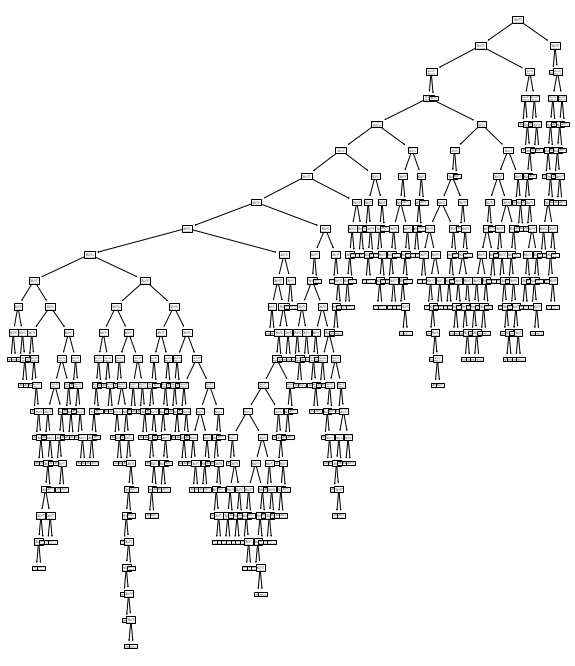

In [29]:
plt.figure(figsize=(10,12))
tree.plot_tree(clf)

In [30]:
x_features = x.columns

[Text(509.1330396075582, 639.2736000000001, 'bmi <= 40.532\ngini = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(471.8009629360466, 613.1808000000001, 'bmi <= 37.085\ngini = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(422.5135537790698, 587.0880000000001, 'bmi <= 37.06\ngini = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(420.20657703488376, 560.9952000000001, 'bmi <= 34.102\ngini = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(367.7712936046512, 534.9024000000001, 'bmi <= 32.933\ngini = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(332.11002906976745, 508.80960000000005, 'bmi <= 32.425\ngini = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(297.69912790697674, 482.71680000000003, 'bmi <= 31.808\ngini = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(247.33313953488374, 456.624, 'children <= 2.5\ngini = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(178.1058139534884, 430.5312, 'age <= 47.5\ngini = 0.32\nsamples = 470\nvalue = [376, 94]'),
 Text(80.816279069

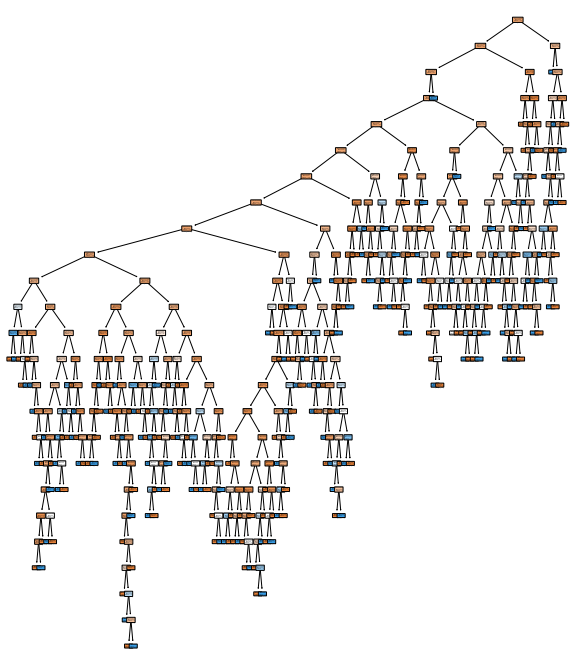

In [31]:
plt.figure(figsize=(10,12))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x_features)